In [1]:
import matplotlib
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def log_interp1d(xx, yy, kind='linear'):
    logx = np.ma.log10(xx).filled(0)
    logy = np.ma.log10(yy).filled(0)
    #logx = np.log10(xx, where=xx>0)
    #logy = np.log10(yy, where=yy>0)
    lin_interp = interp1d(logx, logy, kind=kind)
    log_interp = lambda zz: np.where(zz > 0, np.power(10.0,
                                     lin_interp(np.log10(zz, where=zz>0))), 0)
    return log_interp

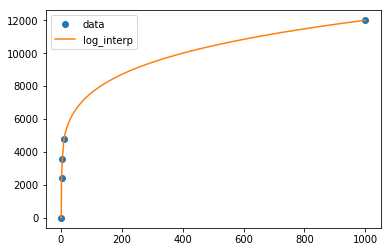

In [4]:
x = np.array([0, 2, 5, 10, 1000])
y = np.array([0, 2400, 3600, 4800, 12000])

f = log_interp1d(x, y)

xnew = np.linspace(0, 1000, num=1000, endpoint=True)

plt.plot(x, y, 'o', xnew, f(xnew), '-')
plt.legend(['data', 'log_interp'], loc='best');

In [5]:
yy = f(xnew)
res = pd.DataFrame({"x":xnew, "y":yy})
res.to_csv("../results/costs.csv", index = False)